In [36]:
import os
import re
import torchvision.transforms as transforms
from matplotlib import pyplot as plt
from normflows.distributions import DiagGaussian
from dataset.TwoMoonDataset import TwoMoonDataset
from flow_models.TwoMoonFlow import TwoMoonFlow

In [88]:
model = 'patch_flow_two_moon'
version = 1
selected_checkpoint = 0

In [89]:
regex = re.compile(r'epoch=(\d+)-step=\d+\.ckpt')
path_to_checkpoint = f'../tb_logs/{model}/version_{version}'
h_params = f'{path_to_checkpoint}/hparams.yaml'
checkpoints_path = f'{path_to_checkpoint}/checkpoints/'
selected_checkpoint_file = None
for filename in os.listdir(checkpoints_path):
    match = regex.match(filename)
    if match:
        epoch_index = int(match.group(1))
        if epoch_index == selected_checkpoint:
            selected_checkpoint_file = filename
checkpoint_path = os.path.join(checkpoints_path, selected_checkpoint_file)
print(f'h_params:{h_params}')
print(f'Checkpoint:{checkpoint_path}')

h_params:../tb_logs/patch_flow_two_moon/version_1/hparams.yaml
Checkpoint:../tb_logs/patch_flow_two_moon/version_1/checkpoints/epoch=0-step=8000.ckpt


In [90]:
flow = TwoMoonFlow.load_from_checkpoint(checkpoint_path=checkpoint_path, hparams_file=h_params)

In [98]:
def plot_scatter(samples):
    x = samples[:, 0]
    y = samples[:, 1]
    plt.scatter(x=x, y=y, s=1)
    plt.show()

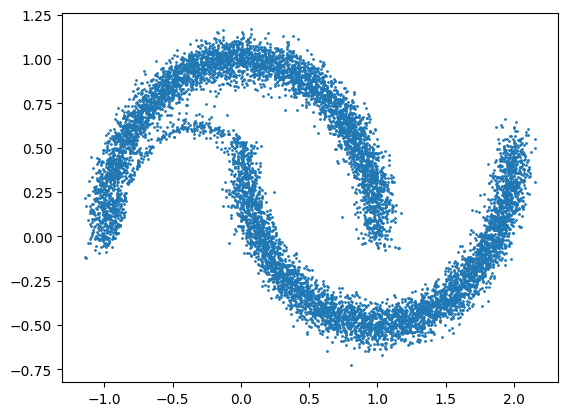

In [99]:
plot_scatter(flow.sample(10000))

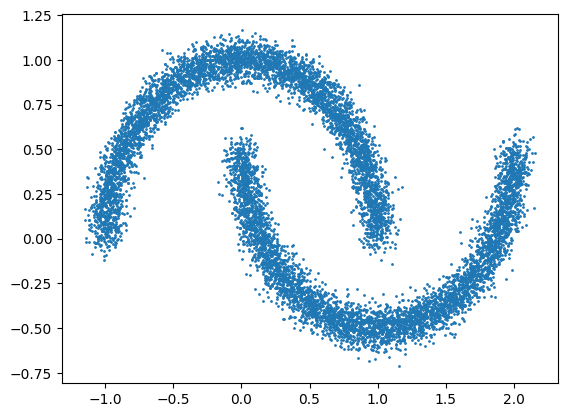

In [100]:
#transform = transforms.Compose([transforms.Lambda(lambda p: 0.20 * (p + 2))])
dataset = TwoMoonDataset(noise=0.06, sample_count=10000)
plot_scatter(dataset)